# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we are going to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Load train and test dataset using Pandas

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [5]:
test.head()

PassengerId  Pclass                                               Name  \
0          669       3                                    Cook, Mr. Jacob   
1          670       1  Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)   
2          671       2  Brown, Mrs. Thomas William Solomon (Elizabeth ...   
3          672       1                             Davidson, Mr. Thornton   
4          673       2                        Mitchell, Mr. Henry Michael   

      Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
0    male  43.0      0      0    A/5 3536   8.05   NaN        S  
1  female   NaN      1      0       19996  52.00  C126        S  
2  female  40.0      1      1       29750  39.00   NaN        S  
3    male  31.0      1      0  F.C. 12750  52.00   B71        S  
4    male  70.0      0      0  C.A. 24580  10.50   NaN        S

**Total rows and columns**

We can see that there are 668 rows and 12 columns in our training dataset.

In [6]:
train.shape

(668, 12)

In [7]:
test.shape

(223, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 12 columns):
PassengerId    668 non-null int64
Survived       668 non-null int64
Pclass         668 non-null int64
Name           668 non-null object
Sex            668 non-null object
Age            528 non-null float64
SibSp          668 non-null int64
Parch          668 non-null int64
Ticket         668 non-null object
Fare           668 non-null float64
Cabin          149 non-null object
Embarked       667 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 62.7+ KB


We can see that *Age* value is missing for many rows. 

Out of 668 rows, the *Age* value is present only in 528 rows.

Similarly, *Cabin* values are also missing in many rows. Only 149 out of 668 rows have *Cabin* values.

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 11 columns):
PassengerId    223 non-null int64
Pclass         223 non-null int64
Name           223 non-null object
Sex            223 non-null object
Age            186 non-null float64
SibSp          223 non-null int64
Parch          223 non-null int64
Ticket         223 non-null object
Fare           223 non-null float64
Cabin          55 non-null object
Embarked       222 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 19.2+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          519
Embarked         1
dtype: int64

There are 140 rows with missing *Age*, 519 rows with missing *Cabin* and 1 rows with missing *Embarked* information.

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             37
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          168
Embarked         1
dtype: int64

### import python lib for visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [13]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

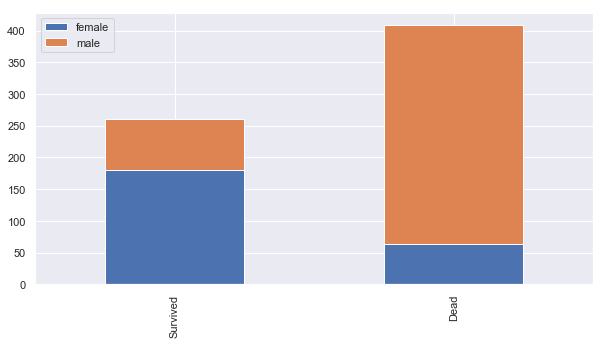

In [14]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

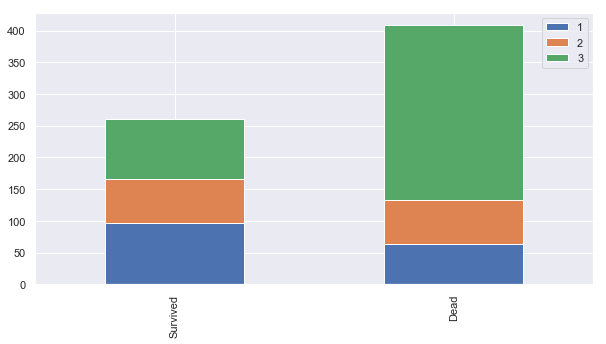

In [15]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

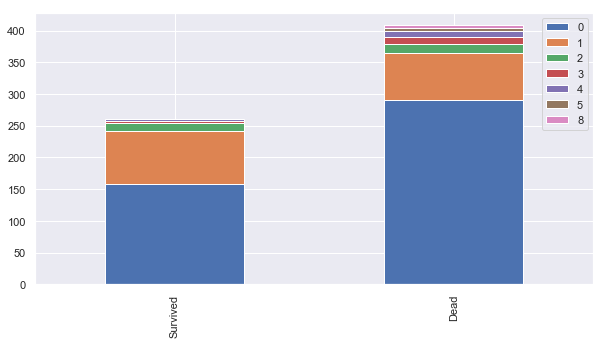

In [16]:
bar_chart('SibSp')

The Chart confirms **a person aboarded without siblings or spouse** more likely dead

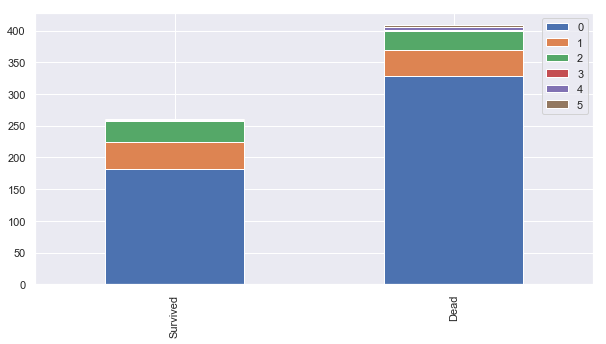

In [17]:
bar_chart('Parch')

The Chart confirms **a person aboarded alone** more likely dead

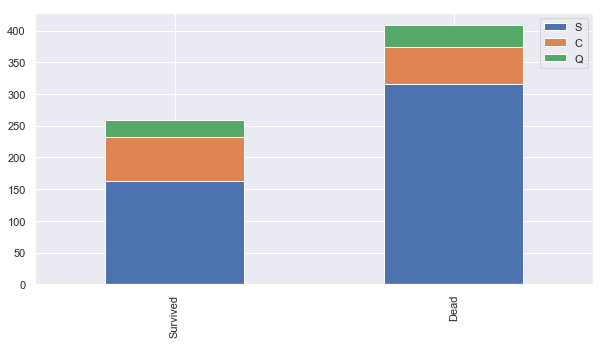

In [18]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [19]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [20]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [21]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

### 4.2 Name

In [22]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
train['Title'].value_counts()

Mr        384
Miss      148
Mrs        91
Master     27
Dr          5
Rev         4
Major       2
Col         1
Mlle        1
Ms          1
Mme         1
Don         1
Lady        1
Sir         1
Name: Title, dtype: int64

In [24]:
test['Title'].value_counts()

Mr          133
Mrs          34
Miss         34
Master       13
Rev           2
Dr            2
Col           1
Countess      1
Capt          1
Mlle          1
Jonkheer      1
Name: Title, dtype: int64

#### Title map
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [25]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [26]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

In [27]:
test.head()

PassengerId  Pclass                                               Name  \
0          669       3                                    Cook, Mr. Jacob   
1          670       1  Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)   
2          671       2  Brown, Mrs. Thomas William Solomon (Elizabeth ...   
3          672       1                             Davidson, Mr. Thornton   
4          673       2                        Mitchell, Mr. Henry Michael   

      Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  Title  
0    male  43.0      0      0    A/5 3536   8.05   NaN        S      0  
1  female   NaN      1      0       19996  52.00  C126        S      2  
2  female  40.0      1      1       29750  39.00   NaN        S      2  
3    male  31.0      1      0  F.C. 12750  52.00   B71        S      0  
4    male  70.0      0      0  C.A. 24580  10.50   NaN        S      0

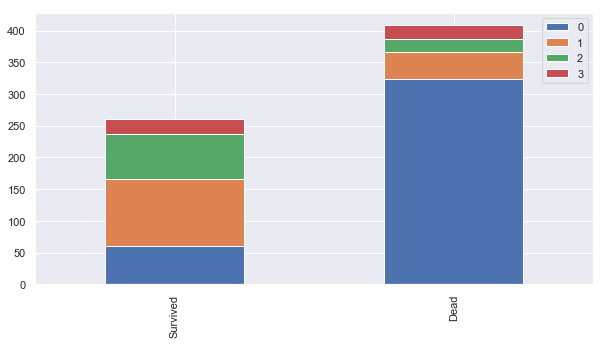

In [28]:
bar_chart('Title')

In [29]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [30]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [31]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch      Ticket   Fare Cabin  \
0          669       3    male  43.0      0      0    A/5 3536   8.05   NaN   
1          670       1  female   NaN      1      0       19996  52.00  C126   
2          671       2  female  40.0      1      1       29750  39.00   NaN   
3          672       1    male  31.0      1      0  F.C. 12750  52.00   B71   
4          673       2    male  70.0      0      0  C.A. 24580  10.50   NaN   

  Embarked  Title  
0        S      0  
1        S      2  
2        S      2  
3        S      0  
4        S      0

### 4.3 Sex

male: 0
female: 1

In [32]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

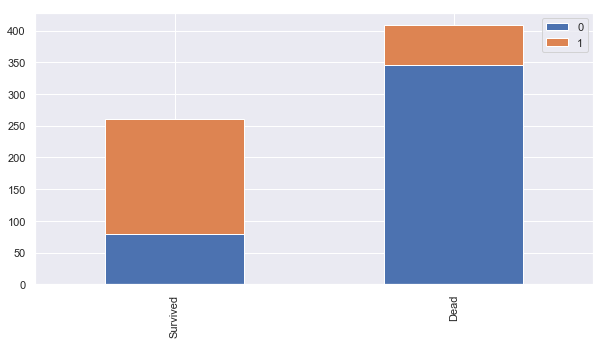

In [33]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

In [34]:
train.head(100)

PassengerId  Survived  Pclass  Sex    Age  SibSp  Parch            Ticket  \
0             1         0       3    0  22.00      1      0         A/5 21171   
1             2         1       1    1  38.00      1      0          PC 17599   
2             3         1       3    1  26.00      0      0  STON/O2. 3101282   
3             4         1       1    1  35.00      1      0            113803   
4             5         0       3    0  35.00      0      0            373450   
5             6         0       3    0    NaN      0      0            330877   
6             7         0       1    0  54.00      0      0             17463   
7             8         0       3    0   2.00      3      1            349909   
8             9         1       3    1  27.00      0      2            347742   
9            10         1       2    1  14.00      1      0            237736   
10           11         1       3    1   4.00      1      1           PP 9549   
11           12         1       1    1  58.00      0      0            113783   
12           13         0       3    0  20.00      0      0         A/5. 2151   
13           14         0       3    0  39.00      1      5            347082   
14           15         0       3    1  14.00      0      0            350406   
15           16         1       2    1  55.00      0      0            248706   
16           17         0       3    0   2.00      4      1            382652   
17           18         1       2    0    NaN      0      0            244373   
18           19         0       3    1  31.00      1      0            345763   
19           20         1       3    1    NaN      0      0              2649   
20           21         0       2    0  35.00      0      0            239865   
21           22         1       2    0  34.00      0      0            248698   
22           23         1       3    1  15.00      0      0            330923   
23           24         1       1    0  28.00      0      0            113788   
24           25         0       3    1   8.00      3      1            349909   
25           26         1       3    1  38.00      1      5            347077   
26           27         0       3    0    NaN      0      0              2631   
27           28         0       1    0  19.00      3      2             19950   
28           29         1       3    1    NaN      0      0            330959   
29           30         0       3    0    NaN      0      0            349216   
..          ...       ...     ...  ...    ...    ...    ...               ...   
70           71         0       2    0  32.00      0      0        C.A. 33111   
71           72         0       3    1  16.00      5      2           CA 2144   
72           73         0       2    0  21.00      0      0      S.O.C. 14879   
73           74         0       3    0  26.00      1      0              2680   
74           75         1       3    0  32.00      0      0              1601   
75           76         0       3    0  25.00      0      0            348123   
76           77         0       3    0    NaN      0      0            349208   
77           78         0       3    0    NaN      0      0            374746   
78           79         1       2    0   0.83      0      2            248738   
79           80         1       3    1  30.00      0      0            364516   
80           81         0       3    0  22.00      0      0            345767   
81           82         1       3    0  29.00      0      0            345779   
82           83         1       3    1    NaN      0      0            330932   
83           84         0       1    0  28.00      0      0            113059   
84           85         1       2    1  17.00      0      0        SO/C 14885   
85           86         1       3    1  33.00      3      0           3101278   
86           87         0       3    0  16.00      1      3        W./C. 6608   
87           88         0       3  

In [35]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [36]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      34.0
2      21.5
3      34.0
4      30.0
5      30.0
6      30.0
7       9.0
8      34.0
9      34.0
10     21.5
11     21.5
12     30.0
13     30.0
14     21.5
15     34.0
16      9.0
17     30.0
18     34.0
19     34.0
20     30.0
21     30.0
22     21.5
23     30.0
24     21.5
25     34.0
26     30.0
27     30.0
28     21.5
29     30.0
       ... 
638    34.0
639    30.0
640    30.0
641     9.0
642    21.5
643    30.0
644    21.5
645    30.0
646    30.0
647     9.0
648    30.0
649    21.5
650    30.0
651    21.5
652    30.0
653    21.5
654    21.5
655    30.0
656    30.0
657    34.0
658    30.0
659    30.0
660     9.0
661    30.0
662    30.0
663    30.0
664    30.0
665    30.0
666    30.0
667    30.0
Name: Age, Length: 668, dtype: float64

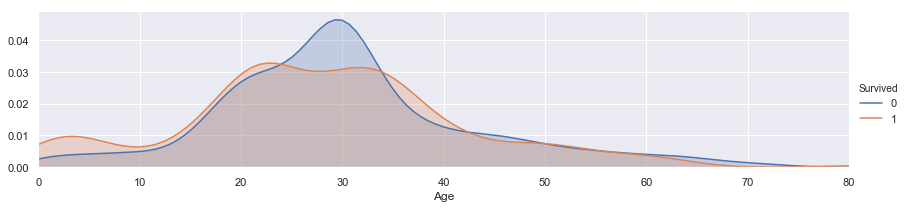

In [37]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0, 20)

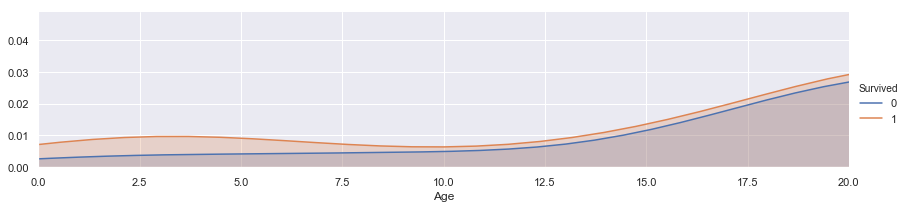

In [38]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [39]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(20, 30)

In [40]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(30, 40)

(40, 60)

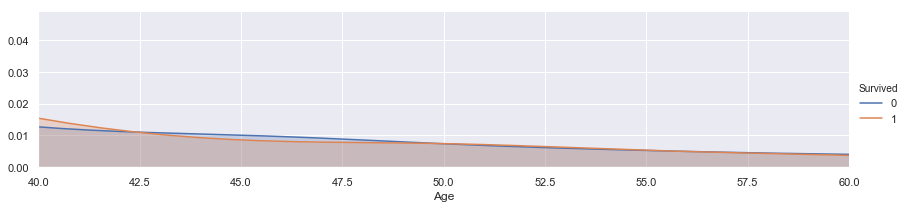

In [41]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(40, 60)

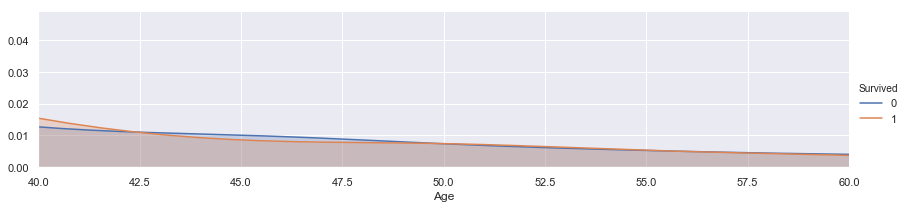

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60, 80.0)

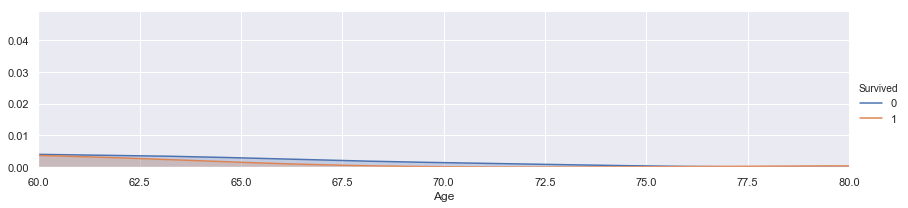

In [43]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 12 columns):
PassengerId    668 non-null int64
Survived       668 non-null int64
Pclass         668 non-null int64
Sex            668 non-null int64
Age            668 non-null float64
SibSp          668 non-null int64
Parch          668 non-null int64
Ticket         668 non-null object
Fare           668 non-null float64
Cabin          149 non-null object
Embarked       667 non-null object
Title          668 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 62.7+ KB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 11 columns):
PassengerId    223 non-null int64
Pclass         223 non-null int64
Sex            223 non-null int64
Age            223 non-null float64
SibSp          223 non-null int64
Parch          223 non-null int64
Ticket         223 non-null object
Fare           223 non-null float64
Cabin          55 non-null object
Embarked       222 non-null object
Title          223 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 19.2+ KB


#### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [46]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [47]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [48]:
bar_chart('Age')

### 4.5 Embarked

#### 4.5.1 filling missing values

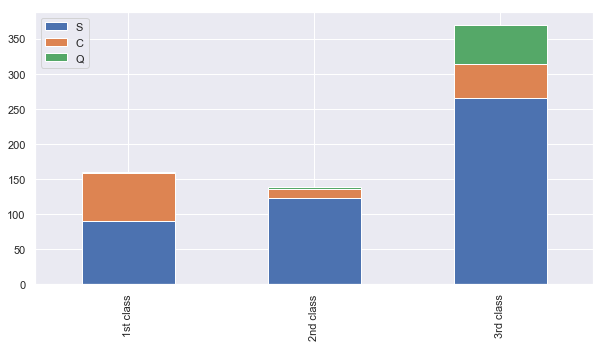

In [49]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [50]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [51]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [52]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare

In [53]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0             1         0       3    0  1.0      1      0         A/5 21171   
1             2         1       1    1  3.0      1      0          PC 17599   
2             3         1       3    1  1.0      0      0  STON/O2. 3101282   
3             4         1       1    1  2.0      1      0            113803   
4             5         0       3    0  2.0      0      0            373450   
5             6         0       3    0  2.0      0      0            330877   
6             7         0       1    0  3.0      0      0             17463   
7             8         0       3    0  0.0      3      1            349909   
8             9         1       3    1  2.0      0      2            347742   
9            10         1       2    1  0.0      1      0            237736   
10           11         1       3    1  0.0      1      1           PP 9549   
11           12         1       1    1  3.0      0      0            113783   
12           13         0       3    0  1.0      0      0         A/5. 2151   
13           14         0       3    0  3.0      1      5            347082   
14           15         0       3    1  0.0      0      0            350406   
15           16         1       2    1  3.0      0      0            248706   
16           17         0       3    0  0.0      4      1            382652   
17           18         1       2    0  2.0      0      0            244373   
18           19         0       3    1  2.0      1      0            345763   
19           20         1       3    1  2.0      0      0              2649   
20           21         0       2    0  2.0      0      0            239865   
21           22         1       2    0  2.0      0      0            248698   
22           23         1       3    1  0.0      0      0            330923   
23           24         1       1    0  2.0      0      0            113788   
24           25         0       3    1  0.0      3      1            349909   
25           26         1       3    1  3.0      1      5            347077   
26           27         0       3    0  2.0      0      0              2631   
27           28         0       1    0  1.0      3      2             19950   
28           29         1       3    1  1.0      0      0            330959   
29           30         0       3    0  2.0      0      0            349216   
30           31         0       1    0  3.0      0      0          PC 17601   
31           32         1       1    1  2.0      1      0          PC 17569   
32           33         1       3    1  1.0      0      0            335677   
33           34         0       2    0  4.0      0      0        C.A. 24579   
34           35         0       1    0  2.0      1      0          PC 17604   
35           36         0       1    0  3.0      1      0            113789   
36           37         1       3    0  2.0      0      0              2677   
37           38         0       3    0  1.0      0      0        A./5. 2152   
38           39         0       3    1  1.0      2      0            345764   
39           40         1       3    1  0.0      1      0              2651   
40           41         0       3    1  3.0      1      0              7546   
41           42         0       2    1  2.0      1      0             11668   
42           43         0       3    0  2.0      0      0            349253   
43           44         1       2    1  0.0      1      2     SC/Paris 2123   
44           45         1       3    1  1.0      0      0            330958   
45           46         0       3    0  2.0      0      0   S.C./A.4. 23567   
46           47         0       3    0  2.0      1      0            370371   
47           48         1       3    1  1.0      0      0             14311   
48           49         0       3    0  2.0      2      0              2662   
49           50         0       3    1  1.0      1    

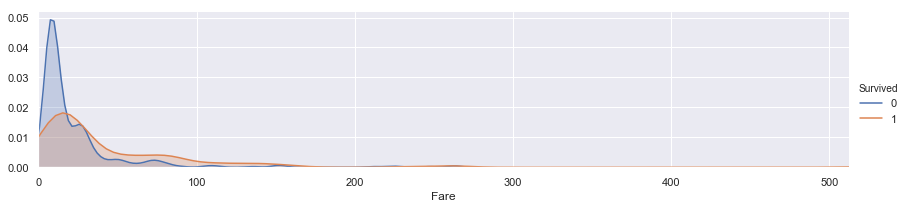

In [54]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

In [55]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 20)

In [56]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 30)

(0, 512.3292)

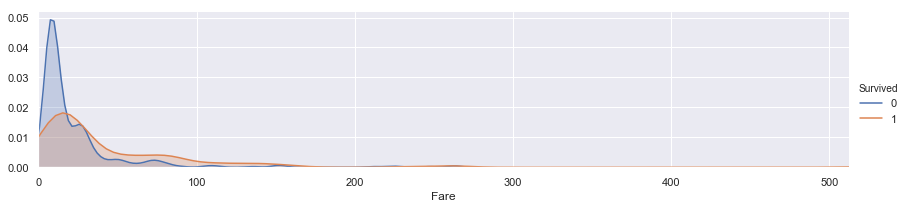

In [57]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [58]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [59]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title  
0   0.0   NaN         0      0  
1   2.0   C85         1      2  
2   0.0   NaN         0      1  
3   2.0  C123         0      2  
4   0.0   NaN         0      0

### 4.7 Cabin

In [60]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
D              3
F33            3
C22 C26        3
F2             3
C78            2
B18            2
C2             2
F4             2
D33            2
C123           2
C125           2
D20            2
B58 B60        2
D36            2
E67            2
C83            2
E33            2
D26            2
E25            2
C65            2
B35            2
B49            2
B96 B98        2
C93            2
E44            2
E101           2
C52            2
D47            1
              ..
E63            1
A14            1
B39            1
C104           1
C103           1
C85            1
C86            1
E36            1
B41            1
A23            1
C106           1
C87            1
B4             1
D50            1
C110           1
B86            1
C82            1
B94            1
A10            1
C68            1
E31            1
C118           1
A26            1
B80            1
E58            1
E10            1
C92            1
C91           

In [61]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

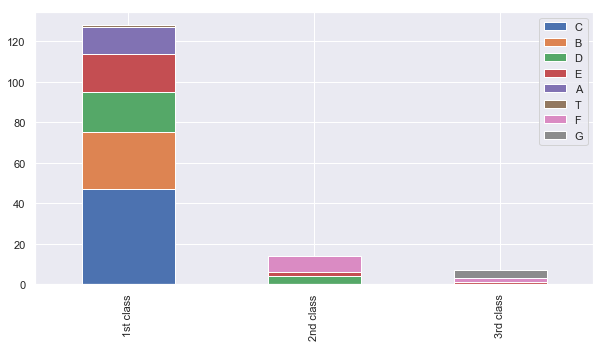

In [62]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [63]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [64]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.8 FamilySize

In [65]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

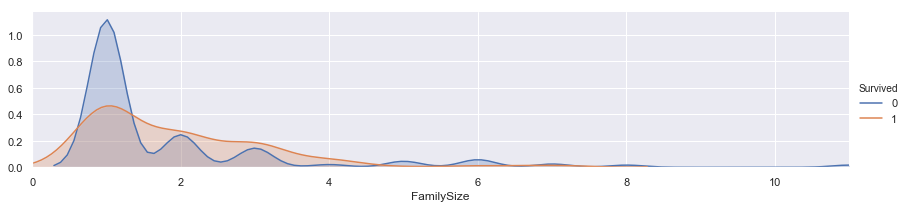

In [66]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [67]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [68]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.4         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.4         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.4         0      0         0.0

In [69]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.4         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.4         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.4         0      0         0.0

In [70]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [71]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((668, 8), (668,))

In [72]:
train_data.head(10)

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.4         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  1.0   0.0    2.4         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.4         0      0         0.0
5       3    0  2.0   0.0    2.4         2      0         0.0
6       1    0  3.0   2.0    1.6         0      0         0.0
7       3    0  0.0   1.0    2.4         0      3         1.6
8       3    1  2.0   0.0    2.4         0      2         0.8
9       2    1  0.0   2.0    2.0         1      2         0.4

## 5. Modelling

In [73]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 9 columns):
Survived      668 non-null int64
Pclass        668 non-null int64
Sex           668 non-null int64
Age           668 non-null float64
Fare          668 non-null float64
Cabin         668 non-null float64
Embarked      668 non-null int64
Title         668 non-null int64
FamilySize    668 non-null float64
dtypes: float64(4), int64(5)
memory usage: 47.0 KB


### 6.2 Cross Validation (K-fold)

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 6.2.1 kNN

In [76]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74626866 0.73134328 0.8358209  0.80597015 0.8358209  0.74626866
 0.76119403 0.85074627 0.81818182 0.78787879]


In [77]:
# kNN Score
round(np.mean(score)*100, 2)

79.19

### 6.2.2 Decision Tree

In [78]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73134328 0.7761194  0.7761194  0.79104478 0.89552239 0.7761194
 0.74626866 0.88059701 0.75757576 0.83333333]


In [79]:
# decision tree Score
round(np.mean(score)*100, 2)

79.64

### 6.2.3 Ramdom Forest

In [80]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.71641791 0.7761194  0.82089552 0.80597015 0.79104478 0.79104478
 0.76119403 0.88059701 0.78787879 0.81818182]


In [81]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.49

### 6.2.4 Naive Bayes

In [82]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76119403 0.70149254 0.80597015 0.76119403 0.76119403 0.76119403
 0.76119403 0.82089552 0.83333333 0.8030303 ]


In [83]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.71

### 6.2.5 SVM

In [84]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76119403 0.76119403 0.86567164 0.8358209  0.8358209  0.86567164
 0.82089552 0.89552239 0.81818182 0.83333333]


In [85]:
round(np.mean(score)*100,2)

82.93

## 7. Testing

In [86]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [87]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [88]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          669         0
1          670         1
2          671         1
3          672         0
4          673         0